In [51]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso,BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re



In [67]:
res=pd.read_csv('res_bron_2020.csv')
edu=pd.read_csv('edu_bro_2020.csv')
off=pd.read_csv('off_man_2020.csv')

In [68]:
res.drop('Unnamed: 0',axis=1, inplace=True)
edu.drop('Unnamed: 0',axis=1, inplace=True)
off.drop('Unnamed: 0',axis=1, inplace=True)

In [69]:
res.shape

(3777, 24)

In [70]:
sc=StandardScaler()
standard=res.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:22]]=sc.fit_transform(standard[sub.columns[1:22]])
standard.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_total,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
0,100.0,3.843913,0.323406,-0.174131,0.272966,-1.942835,-0.650874,0.0,0.0,0.0,...,0.248457,-0.305184,7.358993e-01,-0.311777,-0.271246,0.0,-0.754851,-0.231184,-73.923522,40.825315
1,68.0,0.623531,-0.140264,-0.174131,0.272966,-0.241110,-0.809331,0.0,0.0,0.0,...,-2.176564,-0.305184,2.187718e-16,0.128704,-0.271246,0.0,-0.397753,-0.644119,-73.913511,40.849226
2,99.0,0.281299,-0.140264,-0.174131,0.272966,-1.178733,-0.809331,0.0,0.0,0.0,...,-2.176564,-0.930041,-6.464896e-02,0.789426,-0.271246,0.0,-0.040655,-0.631336,-73.883167,40.849259
3,49.0,-0.090765,-0.140264,-0.174131,0.272966,0.303807,-0.333961,0.0,0.0,0.0,...,-2.176564,-0.930041,4.514342e-01,0.128704,-0.271246,0.0,-1.111950,-0.646444,-73.904360,40.828534
4,8.0,0.085053,-1.133841,-0.174131,0.272966,0.325117,0.405504,0.0,0.0,0.0,...,-2.176564,-0.930041,2.057685e-01,0.348945,-0.271246,0.0,-0.040655,-0.633805,-73.885315,40.842378


In [71]:
sc=Normalizer()
normalized=res.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:22]]=sc.fit_transform(normalized[sub.columns[1:22]])
normalized.head()

,score,largest_property_use_type_gross_floor_area_ft,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site_electricity_intensity_kwh_ft,green_power_offsite_kwh,egrid_output_emissions_rate_kgco2e_mbtu,percent_of_electricity_that_is_green_power,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_total,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
0,100.0,0.999258,0.006639,0.000003,0.000340,0.000081,0.000013,0.0,0.000270,0.0,...,0.000272,0.000306,0.032190,0.000024,0.0,0.0,0.000693,0.020052,-73.923522,40.825315
1,68.0,0.998056,0.018015,0.000009,0.000929,0.000741,0.000033,0.0,0.000738,0.0,...,0.000000,0.000836,0.059575,0.000084,0.0,0.0,0.001904,0.002015,-73.913511,40.849226
2,99.0,0.997292,0.022076,0.000011,0.001138,0.000558,0.000040,0.0,0.000905,0.0,...,0.000000,0.000910,0.069944,0.000137,0.0,0.0,0.002344,0.004472,-73.883167,40.849259
3,49.0,0.991784,0.029118,0.000015,0.001501,0.001466,0.000066,0.0,0.001193,0.0,...,0.000000,0.001201,0.124460,0.000135,0.0,0.0,0.003047,0.002777,-73.904360,40.828534
4,8.0,0.995160,0.024922,0.000013,0.001305,0.001284,0.000076,0.0,0.001037,0.0,...,0.000000,0.001044,0.094872,0.000130,0.0,0.0,0.002688,0.004684,-73.885315,40.842378


In [72]:
X=res.drop('score', axis=1)
y=res['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [73]:
# X=features.drop('score', axis=1)
# y=feat['score']
# X_n=normalized.drop('score', axis=1)
# y_n=normalized['score']
# X_r=standard.drop('score', axis=1)
# y_r=standard['score']

In [74]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2416, 23)
(605, 23)
(756, 23)
(2416,)
(605,)
(756,)


In [75]:
# Standardized
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [76]:
# normalized
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


#PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataPCA, y, test_size = 0.2, random_state = 42)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.20, random_state=1)


In [13]:
from sklearn.model_selection import KFold

In [77]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 51.00
Baseline Performance on the test set: MAE = 26.8876


In [78]:
nam=['Ada Boost','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']



In [79]:
mse_te1

[129.96523891595257,
 264.52941176470586,
 89.18400432825021,
 695.1920352042549,
 124.67841470588235]

In [79]:
def ada(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [258]:
def ada_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = regressor.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(features.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [80]:
ada(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 11.132, val: 10.942
R^2 train: 0.816, val: 0.810


In [81]:
ada(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 17.858, val: 17.308
R^2 train: 0.536, val: 0.534


In [82]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 11.376, val: 11.039
R^2 train: 0.811, val: 0.810


MSE train: 41.896, val: 118.272
R^2 train: 0.955, val: 0.824


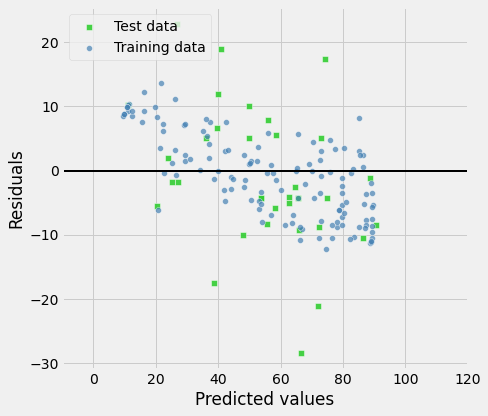

In [259]:
ada_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [227]:
ada_hn(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 129.478, val: 312.118
R^2 train: 0.860, val: 0.535


In [228]:
ada_hr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MSE train: 58.767, val: 163.473
R^2 train: 0.936, val: 0.757


In [20]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [256]:
def dtree_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 12, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'splitter': 'random'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_val_pred,  
                y_val_pred - y_val, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [83]:
dtree(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.000, val: 9.645
R^2 train: 1.000, val: 0.772


In [84]:
dtree(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 0.000, val: 11.398
R^2 train: 1.000, val: 0.685


In [85]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.000, val: 9.569
R^2 train: 1.000, val: 0.777


MSE train: 156.827, val: 288.580
R^2 train: 0.830, val: 0.570


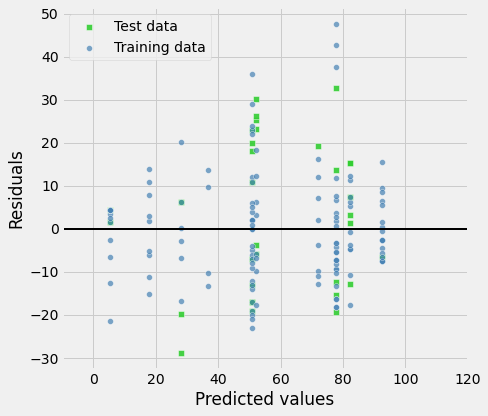

In [257]:
dtree_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [171]:
dtree_hn(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MSE train: 17.479, val: 179.618
R^2 train: 0.981, val: 0.732


MSE train: 126.202, val: 160.054
R^2 train: 0.863, val: 0.762


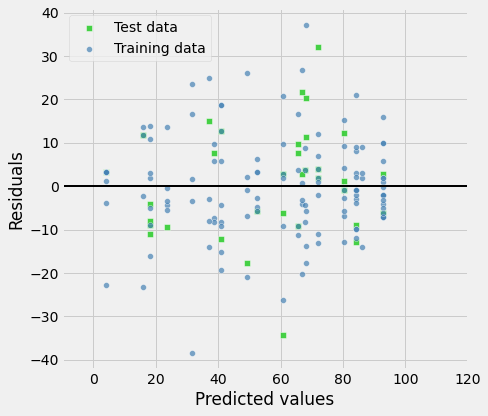

In [255]:
dtree_hr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [46]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg =  xgboost.XGBRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [140]:
def gbr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    #params = {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}
    params = {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
    #val
    reg = xgboost.XGBRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(best.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [43]:
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.7 MB)


In [44]:
# check xgboost version
import xgboost

In [86]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 1.090, val: 6.344
R^2 train: 0.997, val: 0.907


In [87]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 1.411, val: 7.890
R^2 train: 0.996, val: 0.873


In [88]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 1.090, val: 6.344
R^2 train: 0.997, val: 0.907


MAE test: 6.450
R^2 test: 0.910


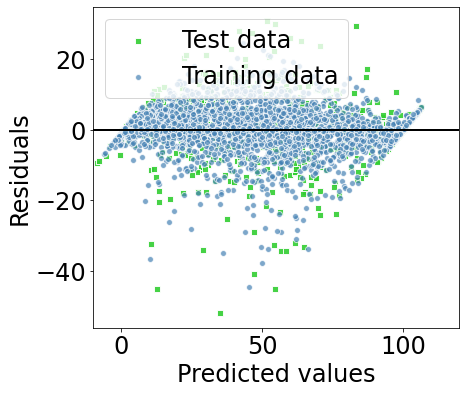

In [141]:
gbr_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [47]:
from sklearn.svm import SVR

In [92]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):
    params = {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))
    

In [137]:
def svr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_test)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(res.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [93]:
svr(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.100, val: 24.783
R^2 train: 1.000, val: 0.017


In [94]:
svr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 23.026, val: 22.301
R^2 train: 0.110, val: 0.096


In [95]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.184, val: 17.572
R^2 train: 0.998, val: 0.423


MAE test: 7.506
R^2 test: 0.892


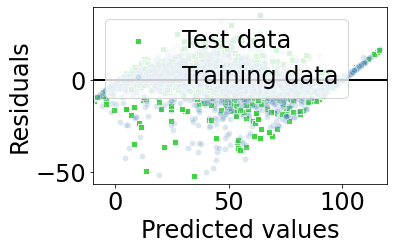

In [138]:
svr_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [32]:
def rf(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [135]:
def rf_h(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

    feature_importances = reg.feature_importances_
    sorted_idxs = np.argsort(feature_importances)[:5]
    poss = np.arange(sorted_idxs.shape[0]) + 0.5
    fig = plt.figure(figsize=(6, 7))
    plt.subplot(1, 2, 1)
    plt.barh(poss, feature_importances[sorted_idxs], align="center")
    plt.yticks(poss, np.array(res.columns)[sorted_idxs])
    plt.title("Feature Importance (MDI)")    
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [96]:
rf(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 2.476, val: 6.133
R^2 train: 0.985, val: 0.911


In [97]:
rf(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 3.128, val: 7.713
R^2 train: 0.979, val: 0.877


In [98]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 2.488, val: 6.014
R^2 train: 0.985, val: 0.914


MAE test: 7.025
R^2 test: 0.890


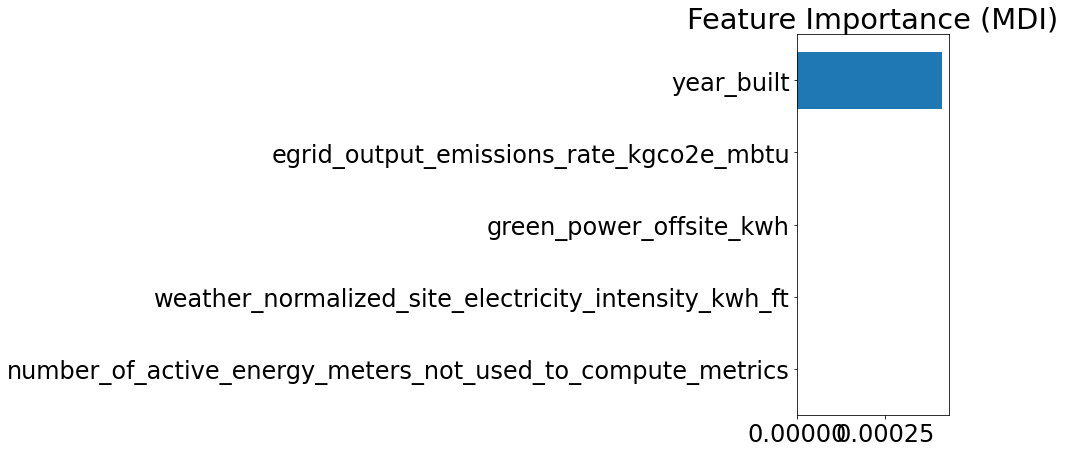

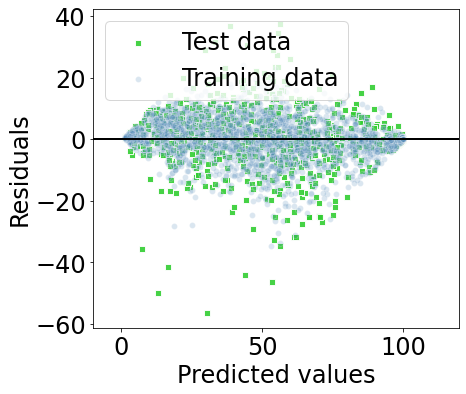

In [136]:
rf_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

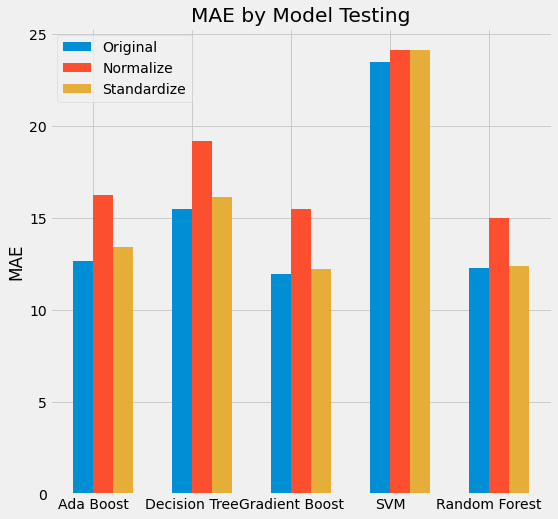

<Figure size 3600x720 with 0 Axes>

In [195]:
#reg
same=[12.65,15.49,11.94,23.48,12.27]
norm=[16.23,19.16,15.48,24.13,15.01]
stand=[13.45,16.13,12.21,24.12,12.41]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE by Model Testing')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

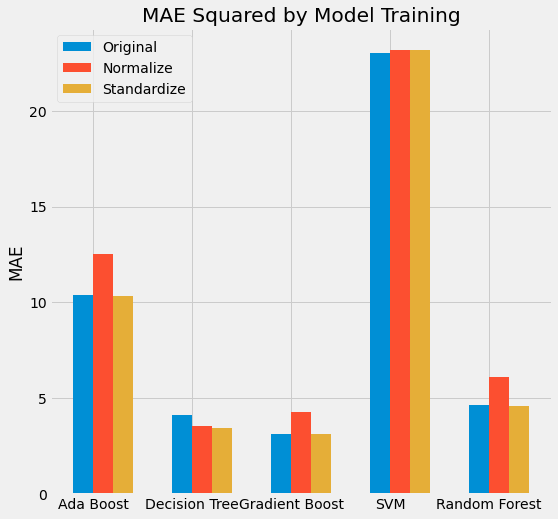

<Figure size 3600x720 with 0 Axes>

In [196]:
#r2
same=[10.37, 4.11,3.12,23.00,4.66]
norm=[12.50,3.56,4.27,23.16,6.13]
stand=[10.33,3.43,3.12,23.14,4.61]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE Squared by Model Training')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

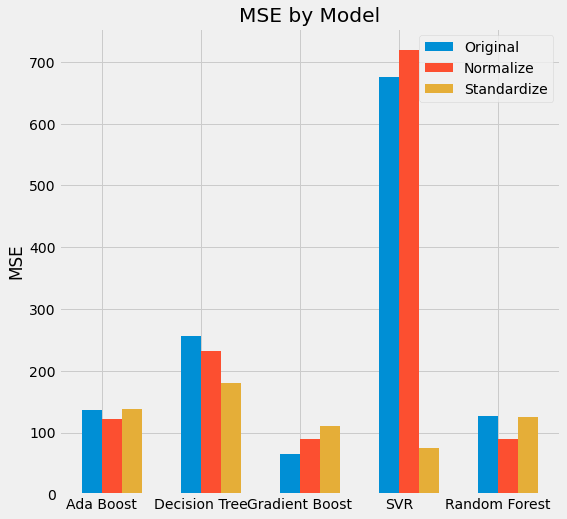

<Figure size 3600x720 with 0 Axes>

In [200]:
#hyper
same=[136.76,256.92,64.66, 675.61,125.99]
norm=[122.33,232.58,90.25,719.21,89.53]
stand=[137.70,179.62,110.49,74.42,125.71]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

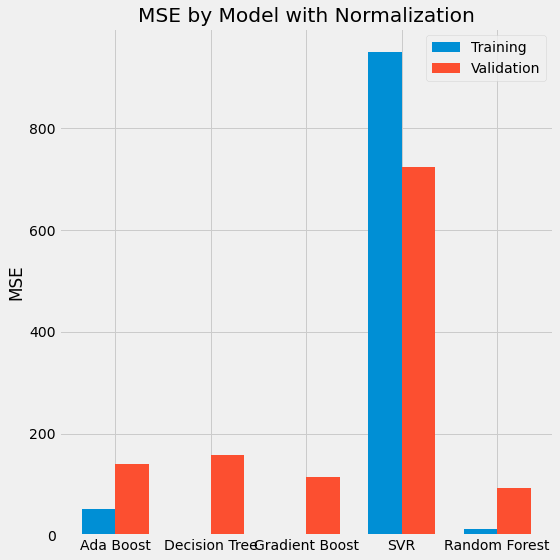

In [199]:
rtr2=[round(num,2) for num in mse_tr2]
rte2=[round(num,2) for num in mse_te2]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr2, width, label='Training')
rects2 = ax.bar(x + width/2, rte2, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Normalization')
ax.set_xticks(x, nam)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

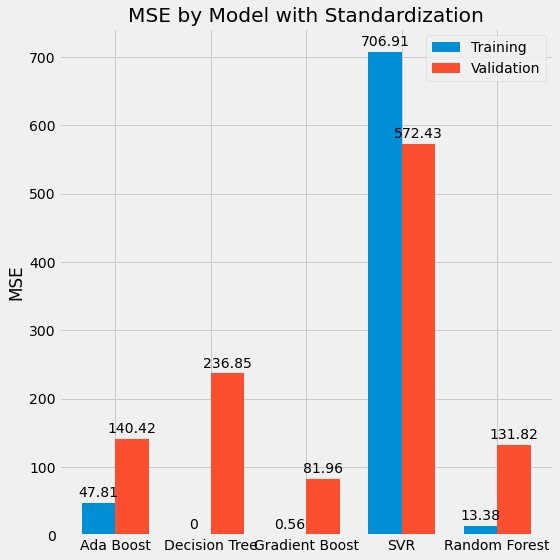

In [158]:
rtr3=[round(num,2) for num in mse_tr3]
rte3=[round(num,2) for num in mse_te3]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr3, width, label='Training')
rects2 = ax.bar(x + width/2, rte3, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Standardization')
ax.set_xticks(x, nam)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [157]:
# Define Data
rtr1=[round(num,2) for num in mse_tr1]
rte1=[round(num,2) for num in mse_te1]


rtr2=[round(num,2) for num in mse_tr2]
rte2=[round(num,2) for num in mse_te2]


rtr3=[round(num,2) for num in mse_tr3]
rte3=[round(num,2) for num in mse_te3]


x = np.arange(len(nam)
width = 0.4

# Draw first subplot

plt.subplot(1, 2, 1)
plt.bar(x - width/2, rtr1, width, label='Training')
plt.bar(x + width/2, rte1, width, label='Validation')

# Draw second subplot

plt.subplot(1, 2, 2)
plt.bar(x - width/2, rtr2, width, label='Training')
plt.bar(x + width/2, rte2, width, label='Validation')

              
# plt.subplot(1, 2, 3)
# plt.bar(x - width/2, rtr3, width, label='Training')
# plt.bar(x + width/2, rte3, width, label='Validation')
# Display

plt.show()

SyntaxError: invalid syntax (3669484822.py, line 15)

HYPERPARAMETER TUNING

In [127]:
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [139]:
# parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                   'n_estimators' : [100,500,1000, 1500],
#                   'max_depth'    : [4,6,8,10]
#                  }
parameters = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

GBR = xgboost.XGBRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

 The best score across ALL searched params:
 -6.697716285335825

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}


In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [128]:
parameters = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['squared_error', 'absolute_error']
}

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=8, n_estimators=500)

 The best score across ALL searched params:
 -7.115874725752814

 The best parameters across ALL searched params:
 {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [129]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=1000, gamma=0.01)

 The best score across ALL searched params:
 -8.173628541870265

 The best parameters across ALL searched params:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
parameters = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

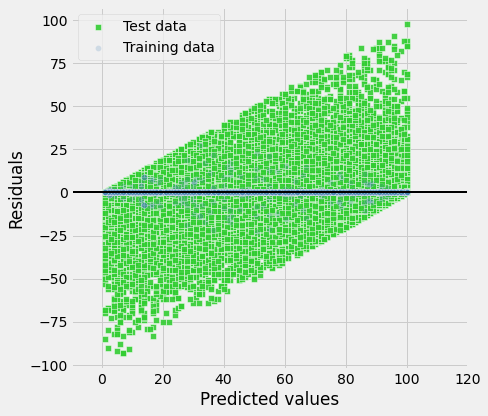

In [135]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    

In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


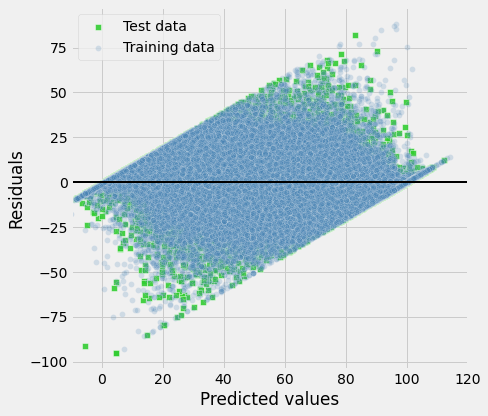

In [138]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    